## MOVIE RECOMMENDATION SYSTEM - ARULALAN V (Reg. No:18194391475)

DATA SCIENCE AND ANALYTICS - MINI PROJECT

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine, correlation

%matplotlib inline



In [2]:
%%writefile extractdataset.pig

DEFINE preprocess1() returns data
{
        $data = load '/ml-100k/u.user' using PigStorage('|');
};

DEFINE preprocess2() returns data
{
        $data = load '/ml-100k/u.data' using PigStorage('|');
};

DEFINE preprocess3() returns data
{
        $data = load '/ml-100k/u.item' using PigStorage('|');
};


u = preprocess1();
rmf /prodata/processed_dataset/user/
store u into '/prodata/processed_dataset/user/' using PigStorage('|');

r = preprocess2();
rmf /prodata/processed_dataset/rating/
store r into '/prodata/processed_dataset/rating/' using PigStorage('|');

i = preprocess3();
rmf /prodata/processed_dataset/items/
store i into '/prodata/processed_dataset/items/' using PigStorage('|');


Overwriting extractdataset.pig


In [3]:
%%bash --err pig_out --bg 
pig -f extractdataset.pig

Starting job # 0 in a separate thread.


In [4]:
import sys;
while True:
    line = pig_out.readline()
    if not line: 
        break
    sys.stdout.write("%s" % line)
    sys.stdout.flush()

18/05/27 02:06:30 INFO pig.ExecTypeProvider: Trying ExecType : LOCAL
18/05/27 02:06:30 INFO pig.ExecTypeProvider: Trying ExecType : MAPREDUCE
18/05/27 02:06:30 INFO pig.ExecTypeProvider: Picked MAPREDUCE as the ExecType
2018-05-27 02:06:30,609 [main] INFO  org.apache.pig.Main - Apache Pig version 0.17.0 (r1797386) compiled Jun 02 2017, 15:41:58
2018-05-27 02:06:30,610 [main] INFO  org.apache.pig.Main - Logging error messages to: /home/hduser/Desktop/MINI_PROJECT/pig_1527366990597.log
2018-05-27 02:06:30,983 [main] WARN  org.apache.hadoop.util.NativeCodeLoader - Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
2018-05-27 02:06:31,347 [main] INFO  org.apache.pig.impl.util.Utils - Default bootup file /home/hduser/.pigbootup not found
2018-05-27 02:06:31,538 [main] INFO  org.apache.hadoop.conf.Configuration.deprecation - mapred.job.tracker is deprecated. Instead, use mapreduce.jobtracker.address
2018-05-27 02:06:31,538 [main] INFO  org.a

2018-05-27 02:06:38,495 [JobControl] INFO  org.apache.hadoop.mapred.LocalDistributedCacheManager - Localized hdfs://localhost:54310/tmp/temp347464014/tmp-2049475219/pig-0.17.0-core-h2.jar as file:/app/hadoop/tmp/mapred/local/1527366998015/pig-0.17.0-core-h2.jar
2018-05-27 02:06:38,495 [JobControl] INFO  org.apache.hadoop.mapred.LocalDistributedCacheManager - Creating symlink: /app/hadoop/tmp/mapred/local/1527366998016/automaton-1.11-8.jar <- /home/hduser/Desktop/MINI_PROJECT/automaton-1.11-8.jar
2018-05-27 02:06:38,500 [JobControl] INFO  org.apache.hadoop.mapred.LocalDistributedCacheManager - Localized hdfs://localhost:54310/tmp/temp347464014/tmp902081992/automaton-1.11-8.jar as file:/app/hadoop/tmp/mapred/local/1527366998016/automaton-1.11-8.jar
2018-05-27 02:06:38,500 [JobControl] INFO  org.apache.hadoop.mapred.LocalDistributedCacheManager - Creating symlink: /app/hadoop/tmp/mapred/local/1527366998017/antlr-runtime-3.4.jar <- /home/hduser/Desktop/MINI_PROJECT/antlr-runtime-3.4.jar
20

2018-05-27 02:06:43,723 [main] INFO  org.apache.hadoop.conf.Configuration.deprecation - mapred.map.tasks is deprecated. Instead, use mapreduce.job.maps
2018-05-27 02:06:43,723 [main] INFO  org.apache.hadoop.conf.Configuration.deprecation - mapred.reduce.tasks is deprecated. Instead, use mapreduce.job.reduces
2018-05-27 02:06:43,724 [main] INFO  org.apache.hadoop.metrics.jvm.JvmMetrics - Cannot initialize JVM Metrics with processName=JobTracker, sessionId= - already initialized
2018-05-27 02:06:43,786 [main] INFO  org.apache.pig.backend.hadoop.executionengine.mapReduceLayer.MapReduceLauncher - 100% complete
2018-05-27 02:06:43,790 [main] INFO  org.apache.pig.tools.pigstats.mapreduce.SimplePigStats - Script Statistics: 

HadoopVersion	PigVersion	UserId	StartedAt	FinishedAt	Features
2.5.1	0.17.0	hduser	2018-05-27 02:06:34	2018-05-27 02:06:43	UNKNOWN

Success!

Job Stats (time in seconds):
JobId	Maps	Reduces	MaxMapTime	MinMapTime	AvgMapTime	MedianMapTime	MaxReduceTime	MinReduceTime	AvgRedu

2018-05-27 02:06:44,716 [JobControl] INFO  org.apache.hadoop.mapred.LocalDistributedCacheManager - Creating symlink: /app/hadoop/tmp/mapred/local/1527367004521/antlr-runtime-3.4.jar <- /home/hduser/Desktop/MINI_PROJECT/antlr-runtime-3.4.jar
2018-05-27 02:06:44,720 [JobControl] INFO  org.apache.hadoop.mapred.LocalDistributedCacheManager - Localized hdfs://localhost:54310/tmp/temp347464014/tmp-1568677205/antlr-runtime-3.4.jar as file:/app/hadoop/tmp/mapred/local/1527367004521/antlr-runtime-3.4.jar
2018-05-27 02:06:44,720 [JobControl] INFO  org.apache.hadoop.mapred.LocalDistributedCacheManager - Creating symlink: /app/hadoop/tmp/mapred/local/1527367004522/joda-time-2.9.3.jar <- /home/hduser/Desktop/MINI_PROJECT/joda-time-2.9.3.jar
2018-05-27 02:06:44,725 [JobControl] INFO  org.apache.hadoop.mapred.LocalDistributedCacheManager - Localized hdfs://localhost:54310/tmp/temp347464014/tmp-2030467645/joda-time-2.9.3.jar as file:/app/hadoop/tmp/mapred/local/1527367004522/joda-time-2.9.3.jar
2018-0

job_local1491670795_0002	1	0	n/a	n/a	n/a	n/a	0	0	0	0	r	MAP_ONLY	/prodata/processed_dataset/rating,

Input(s):
Successfully read 100000 records (13513365 bytes) from: "/ml-100k/u.data"

Output(s):
Successfully stored 100000 records (13513365 bytes) in: "/prodata/processed_dataset/rating"

Counters:
Total records written : 100000
Total bytes written : 13513365
Spillable Memory Manager spill count : 0
Total bags proactively spilled: 0
Total records proactively spilled: 0

Job DAG:
job_local1491670795_0002


2018-05-27 02:06:49,900 [main] INFO  org.apache.hadoop.metrics.jvm.JvmMetrics - Cannot initialize JVM Metrics with processName=JobTracker, sessionId= - already initialized
2018-05-27 02:06:49,901 [main] INFO  org.apache.hadoop.metrics.jvm.JvmMetrics - Cannot initialize JVM Metrics with processName=JobTracker, sessionId= - already initialized
2018-05-27 02:06:49,903 [main] INFO  org.apache.hadoop.metrics.jvm.JvmMetrics - Cannot initialize JVM Metrics with processName=JobTracker, session

2018-05-27 02:06:50,898 [JobControl] WARN  org.apache.hadoop.conf.Configuration - file:/app/hadoop/tmp/mapred/local/localRunner/hduser/job_local1136921766_0003/job_local1136921766_0003.xml:an attempt to override final parameter: mapreduce.job.end-notification.max.retry.interval;  Ignoring.
2018-05-27 02:06:50,900 [JobControl] WARN  org.apache.hadoop.conf.Configuration - file:/app/hadoop/tmp/mapred/local/localRunner/hduser/job_local1136921766_0003/job_local1136921766_0003.xml:an attempt to override final parameter: mapreduce.job.end-notification.max.attempts;  Ignoring.
2018-05-27 02:06:50,900 [JobControl] INFO  org.apache.hadoop.mapred.LocalDistributedCacheManager - file:/app/hadoop/tmp/mapred/local/1527367010640/pig-0.17.0-core-h2.jar
2018-05-27 02:06:50,900 [JobControl] INFO  org.apache.hadoop.mapred.LocalDistributedCacheManager - file:/app/hadoop/tmp/mapred/local/1527367010641/automaton-1.11-8.jar
2018-05-27 02:06:50,900 [JobControl] INFO  org.apache.hadoop.mapred.LocalDistributedCa

2018-05-27 02:06:56,015 [main] INFO  org.apache.pig.backend.hadoop.executionengine.mapReduceLayer.MapReduceLauncher - Success!
2018-05-27 02:06:56,061 [main] INFO  org.apache.pig.Main - Pig script completed in 25 seconds and 843 milliseconds (25843 ms)


In [5]:
from subprocess import Popen,PIPE
p=Popen(['hdfs dfs -get /prodata/processed_dataset/rating/part-m-00000 /home/hduser/processed_dataset/r/'],shell=True,stdout=PIPE)
stdout,stderr=p.communicate()
print stdout,stderr
p=Popen(['hdfs dfs -get /prodata/processed_dataset/user/part-m-00000 /home/hduser/processed_dataset/u/'],shell=True,stdout=PIPE)
stdout,stderr=p.communicate()
print stdout,stderr
p=Popen(['hdfs dfs -get /prodata/processed_dataset/items/part-m-00000 /home/hduser/processed_dataset/i/'],shell=True,stdout=PIPE)
stdout,stderr=p.communicate()
print stdout,stderr

 None
 None
 None


In [6]:
u_cols = ['user_id', 'age', 'sex', 'occupation', 'zip_code']
users = pd.read_csv('/home/hduser/processed_dataset/u/part-m-00000', sep='|', names=u_cols,
                    encoding='latin-1', parse_dates=True) 

r_cols = ['user_id', 'movie_id', 'rating', 'unix_timestamp']
ratings = pd.read_csv('/home/hduser/processed_dataset/r/part-m-00000', sep='\t', names=r_cols,
                      encoding='latin-1')

m_cols = ['movie_id', 'title', 'release_date', 'video_release_date', 'imdb_url']
movies = pd.read_csv('/home/hduser/processed_dataset/i/part-m-00000', sep='|', names=m_cols, usecols=range(5),
                     encoding='latin-1')




In [8]:
movie_ratings = pd.merge(movies, ratings)
df = pd.merge(movie_ratings, users)

df.head(11)


,movie_id,title,release_date,video_release_date,imdb_url,user_id,rating,unix_timestamp,age,sex,occupation,zip_code
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,308,4,887736532,60,M,retired,95076
1,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,308,5,887737890,60,M,retired,95076
2,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),308,4,887739608,60,M,retired,95076
3,7,Twelve Monkeys (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Twelve%20Monk...,308,4,887738847,60,M,retired,95076
4,8,Babe (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Babe%20(1995),308,5,887736696,60,M,retired,95076
5,9,Dead Man Walking (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Dead%20Man%20...,308,4,887737194,60,M,retired,95076
6,11,Seven (Se7en) (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Se7en%20(1995),308,5,887737837,60,M,retired,95076
7,12,"Usual Suspects, The (1995)",14-Aug-1995,NaN,http://us.imdb.com/M/title-exact?Usual%20Suspe...,308,5,887737243,60,M,retired,95076
8,15,Mr. Holland's Opus (1995),29-Jan-1996,NaN,http://us.imdb.com/M/title-exact?Mr.%20Holland...,308,3,887739426,60,M,retired,95076
9,17,From Dusk Till Dawn (1996),05-Feb-1996,NaN,http://us.imdb.com/M/title-exact?From%20Dusk%2...,308,4,887739056,60,M,retired,95076


In [3]:
ratings.head(20)

,user_id,movie_id,rating,unix_timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596
5,298,474,4,884182806
6,115,265,2,881171488
7,253,465,5,891628467
8,305,451,3,886324817
9,6,86,3,883603013


In [9]:
movies.head(20)

,movie_id,title,release_date,video_release_date,imdb_url
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995)
5,6,Shanghai Triad (Yao a yao yao dao waipo qiao) ...,01-Jan-1995,NaN,http://us.imdb.com/Title?Yao+a+yao+yao+dao+wai...
6,7,Twelve Monkeys (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Twelve%20Monk...
7,8,Babe (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Babe%20(1995)
8,9,Dead Man Walking (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Dead%20Man%20...
9,10,Richard III (1995),22-Jan-1996,NaN,http://us.imdb.com/M/title-exact?Richard%20III...


In [10]:
users.head(20)

,user_id,age,sex,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
5,6,42,M,executive,98101
6,7,57,M,administrator,91344
7,8,36,M,administrator,05201
8,9,29,M,student,01002
9,10,53,M,lawyer,90703


# Data Pre-Processing

In [11]:
df.drop(df.columns[[3,4,7]], axis=1, inplace=True)
ratings.drop( "unix_timestamp", inplace = True, axis = 1 ) 
movies.drop(movies.columns[[3,4]], inplace = True, axis = 1 )
df.info()
movies.head(2)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 9 columns):
movie_id        100000 non-null int64
title           100000 non-null object
release_date    99991 non-null object
user_id         100000 non-null int64
rating          100000 non-null int64
age             100000 non-null int64
sex             100000 non-null object
occupation      100000 non-null object
zip_code        100000 non-null object
dtypes: int64(4), object(5)
memory usage: 7.6+ MB


,movie_id,title,release_date
0,1,Toy Story (1995),01-Jan-1995
1,2,GoldenEye (1995),01-Jan-1995


In [12]:
df.head(3)

,movie_id,title,release_date,user_id,rating,age,sex,occupation,zip_code
0,1,Toy Story (1995),01-Jan-1995,308,4,60,M,retired,95076
1,4,Get Shorty (1995),01-Jan-1995,308,5,60,M,retired,95076
2,5,Copycat (1995),01-Jan-1995,308,4,60,M,retired,95076


In [13]:
ratings.head(2)

,user_id,movie_id,rating
0,196,242,3
1,186,302,3


# Movie Ratings

In [14]:
movie_stats = df.groupby('title').agg({'rating': [np.size, np.mean]})
movie_stats.head()

rating          
                            size      mean
title                                     
'Til There Was You (1997)      9  2.333333
1-900 (1994)                   5  2.600000
101 Dalmatians (1996)        109  2.908257
12 Angry Men (1957)          125  4.344000
187 (1997)                    41  3.024390

Setting a threshold of atleast 50 ratings for better analysis.

In [15]:
min_50 = movie_stats['rating']['size'] >= 50
movie_stats[min_50].sort_values([('rating', 'mean')], ascending=False).head()


rating          
                                                     size      mean
title                                                              
Close Shave, A (1995)                                 112  4.491071
Schindler's List (1993)                               298  4.466443
Wrong Trousers, The (1993)                            118  4.466102
Casablanca (1942)                                     243  4.456790
Wallace & Gromit: The Best of Aardman Animation...     67  4.447761

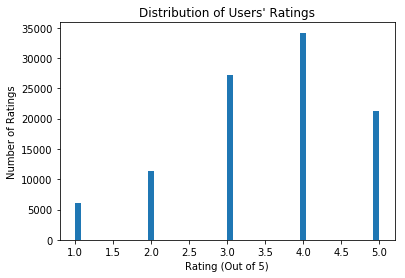

In [16]:
ratings.rating.plot.hist(bins=50)
plt.title("Distribution of Users' Ratings")
plt.ylabel('Number of Ratings')
plt.xlabel('Rating (Out of 5)');

# Raters' Age Distribution

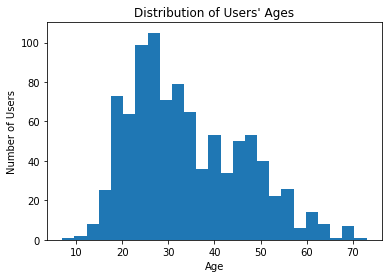

In [17]:
users.age.plot.hist(bins=25)
plt.title("Distribution of Users' Ages")
plt.ylabel('Number of Users')
plt.xlabel('Age');

# Pivot Table

In [18]:
ratings_matrix = ratings.pivot_table(index=['movie_id'],columns=['user_id'],values='rating').reset_index(drop=True)
ratings_matrix.fillna( 0, inplace = True )
ratings_matrix.head()

user_id,1,2,3,4,5,6,7,8,9,10,...,934,935,936,937,938,939,940,941,942,943
0,5.0,4.0,0.0,0.0,4.0,4.0,0.0,0.0,0.0,4.0,...,2.0,3.0,4.0,0.0,4.0,0.0,0.0,5.0,0.0,0.0
1,3.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,...,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
2,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,4.0,...,5.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0
4,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Cosine Similarity

In [19]:
movie_similarity = 1 - pairwise_distances( ratings_matrix.as_matrix(), metric="cosine" )
np.fill_diagonal( movie_similarity, 0 ) #Filling diagonals with 0s for future use when sorting is done
ratings_matrix = pd.DataFrame( movie_similarity )
ratings_matrix.head(5)

,0,1,2,3,4,5,6,7,8,9,...,1672,1673,1674,1675,1676,1677,1678,1679,1680,1681
0,0.000000,0.402382,0.330245,0.454938,0.286714,0.116344,0.620979,0.481114,0.496288,0.273935,...,0.035387,0.0,0.000000,0.000000,0.035387,0.0,0.0,0.0,0.047183,0.047183
1,0.402382,0.000000,0.273069,0.502571,0.318836,0.083563,0.383403,0.337002,0.255252,0.171082,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.078299,0.078299
2,0.330245,0.273069,0.000000,0.324866,0.212957,0.106722,0.372921,0.200794,0.273669,0.158104,...,0.000000,0.0,0.000000,0.000000,0.032292,0.0,0.0,0.0,0.000000,0.096875
3,0.454938,0.502571,0.324866,0.000000,0.334239,0.090308,0.489283,0.490236,0.419044,0.252561,...,0.000000,0.0,0.094022,0.094022,0.037609,0.0,0.0,0.0,0.056413,0.075218
4,0.286714,0.318836,0.212957,0.334239,0.000000,0.037299,0.334769,0.259161,0.272448,0.055453,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.094211


# Recommender Engine

In [20]:
try:
    #user_inp=input('Enter the reference movie title based on which recommendations are to be made: ')
    user_inp="Copycat (1995)"
    inp=movies[movies['title']==user_inp].index.tolist()
    inp=inp[0]
    
    movies['similarity'] = ratings_matrix.iloc[inp]
    movies.columns = ['movie_id', 'title', 'release_date','similarity']
    movies.head(5)
    (movies.sort_values( ["similarity"], ascending = False )[1:10]).to_csv("Recommended_List.csv")
    p=Popen('hdfs dfs -copyFromLocal -f ./Recommended_List.csv /ml-100k/Output/',shell=True,stdout=PIPE)
    stdo,stde=p.communicate()
    print stde
except:
    print("Sorry, the movie is not in the database!")
    


None


In [21]:
print "Recommended movies based on your choice of ",user_inp ,"                                                   ", movies.sort_values(["similarity"], ascending = False )[1:10]

Recommended movies based on your choice of  Copycat (1995)                                                          movie_id                              title release_date  similarity
218       219  Nightmare on Elm Street, A (1984)  01-Jan-1984    0.472725
53         54                    Outbreak (1995)  01-Jan-1995    0.472399
233       234                        Jaws (1975)  01-Jan-1975    0.450780
52         53        Natural Born Killers (1994)  01-Jan-1994    0.445242
97         98   Silence of the Lambs, The (1991)  01-Jan-1991    0.440996
671       672                    Candyman (1992)  01-Jan-1992    0.435349
199       200                Shining, The (1980)  01-Jan-1980    0.430292
664       665                     Alien 3 (1992)  01-Jan-1992    0.425298
558       559  Interview with the Vampire (1994)  01-Jan-1994    0.424652


In [22]:
print("enjoy your MOVIE, Thank You")

enjoy your MOVIE, Thank You


# MOVIE RECOMMENDATION SYSTEM - BY ARULALAN V